In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
salary_train = pd.read_csv("C:/Users/SANJAY/Desktop/ExcelR/Assignments/Assignment - 12/Naive Bayes/SalaryData_Train.csv")
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
salary_test = pd.read_csv("C:/Users/SANJAY/Desktop/ExcelR/Assignments/Assignment - 12/Naive Bayes/SalaryData_Test.csv.opdownload")
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


# Exploratory Data Analysis

In [4]:
salary_train.shape

(30161, 14)

In [5]:
salary_test.shape

(9162, 14)

In [6]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,9162.000000,9162.000000,9161.000000,9161.000000,9161.000000
mean,38.693517,10.119188,1193.950770,90.656697,41.061893
std,13.377450,2.560476,8209.741337,410.528193,12.053927
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [8]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9162 entries, 0 to 9161
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            9162 non-null   int64  
 1   workclass      9162 non-null   object 
 2   education      9162 non-null   object 
 3   educationno    9162 non-null   int64  
 4   maritalstatus  9162 non-null   object 
 5   occupation     9162 non-null   object 
 6   relationship   9162 non-null   object 
 7   race           9162 non-null   object 
 8   sex            9161 non-null   object 
 9   capitalgain    9161 non-null   float64
 10  capitalloss    9161 non-null   float64
 11  hoursperweek   9161 non-null   float64
 12  native         9161 non-null   object 
 13  Salary         9161 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1002.2+ KB


# Explore categorical variables

In [10]:
# find categorical variables train_data

categorical = [var for var in salary_train.columns if salary_train[var].dtype == 'object' ]

print('There are {} categorical variables \n'.format(len(categorical)))
print("The categorical variable are: \n \n",categorical)

There are 9 categorical variables 

The categorical variable are: 
 
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [11]:
# find categorical variables test_data

categorical_test = [var for var in salary_test.columns if salary_test[var].dtype == 'object']

print('There are {} variable \n'.format(len(categorical_test)))
print("The categorical varibales are:\n\n",categorical_test)


There are 9 variable 

The categorical varibales are:

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [12]:
# check missing values in categorical variables
salary_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [13]:
# check missing values in categorical variables
salary_test[categorical_test].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              1
native           1
Salary           1
dtype: int64

In [14]:
# Frequency count of values in categorical variables Train data
for var in categorical:
    print(salary_train[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [15]:
# Frequency count of values in categorical variables Test data
for var in categorical_test:
    print(salary_test[var].value_counts())

 Private             6675
 Self-emp-not-inc     790
 Local-gov            622
 State-gov            428
 Self-emp-inc         361
 Federal-gov          282
 Without-pay            4
Name: workclass, dtype: int64
 HS-grad         3006
 Some-college    1950
 Bachelors       1554
 Masters          535
 Assoc-voc        410
 11th             332
 Assoc-acdm       301
 10th             248
 7th-8th          168
 Prof-school      146
 9th              137
 12th             117
 Doctorate        104
 5th-6th           93
 1st-4th           45
 Preschool         16
Name: education, dtype: int64
 Married-civ-spouse       4207
 Never-married            2994
 Divorced                 1261
 Separated                 290
 Widowed                   288
 Married-spouse-absent     114
 Married-AF-spouse           8
Name: maritalstatus, dtype: int64
 Exec-managerial      1235
 Prof-specialty       1221
 Craft-repair         1208
 Adm-clerical         1091
 Sales                1078
 Other-service      

# Explore Numerical Variables

In [16]:
#find Numercial variables train_data

numerical_train = [var for var in salary_train.columns if salary_train[var].dtype!='object']

print('There are {} numerical variables\n'.format(len(numerical_train)))

print('The numerical variables are :', numerical_train)


There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [17]:
numerical_test = [var for var in salary_train.columns if salary_train[var].dtype!='object']

print('There are {} numerical variables\n'.format(len(numerical_test)))

print('The numerical variables are :', numerical_test)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [18]:
salary_train[numerical_train].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [19]:
salary_test[numerical_test].isnull().sum()

age             0
educationno     0
capitalgain     1
capitalloss     1
hoursperweek    1
dtype: int64

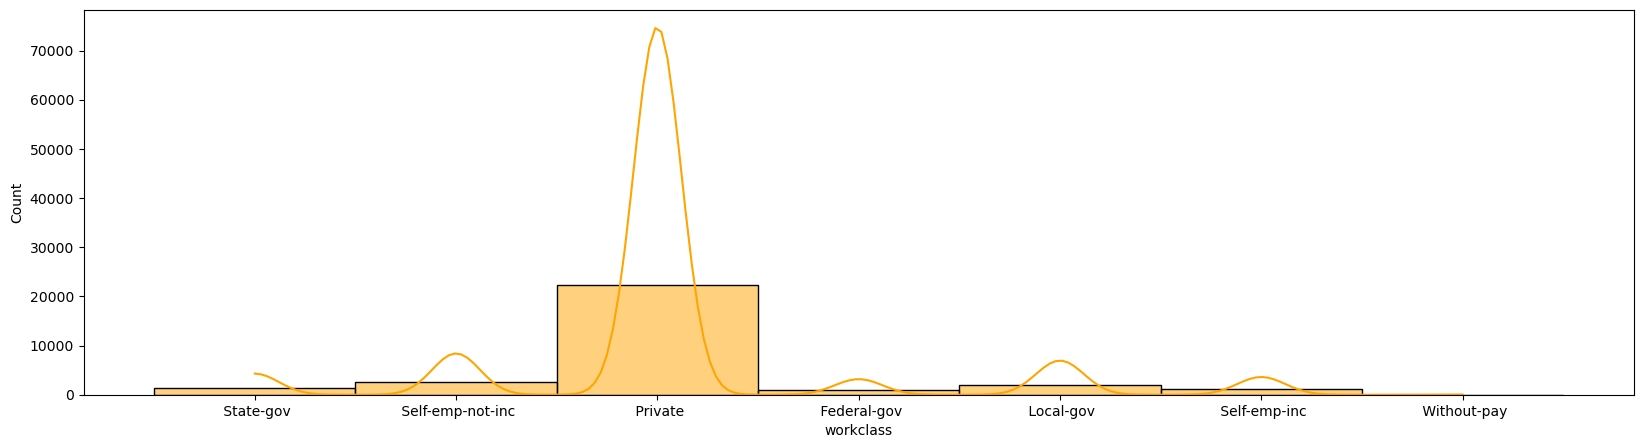

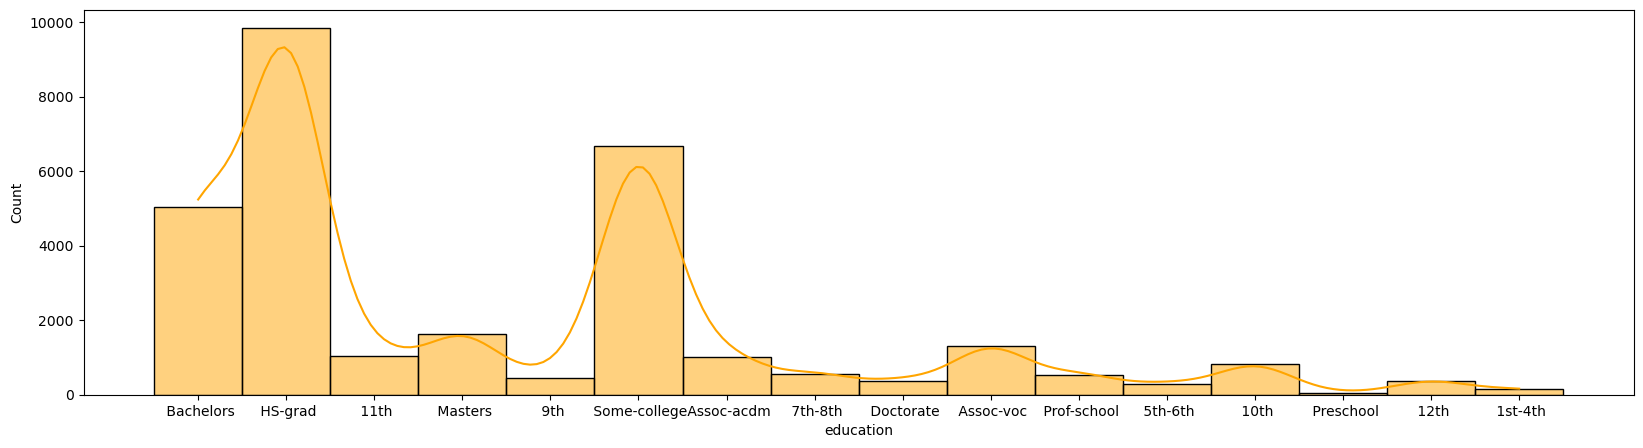

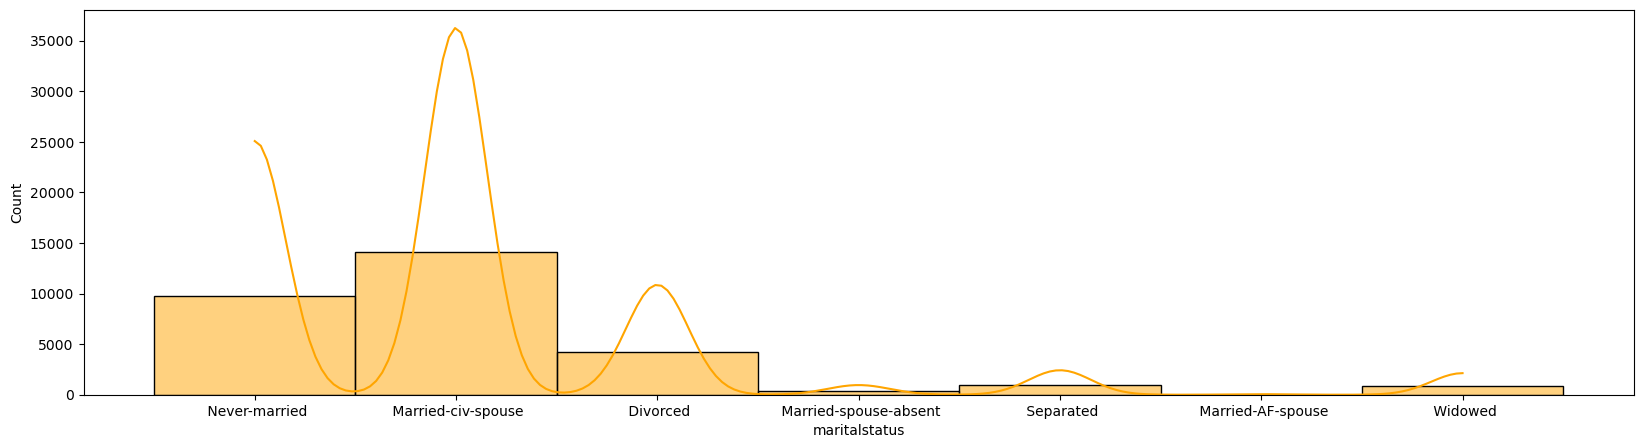

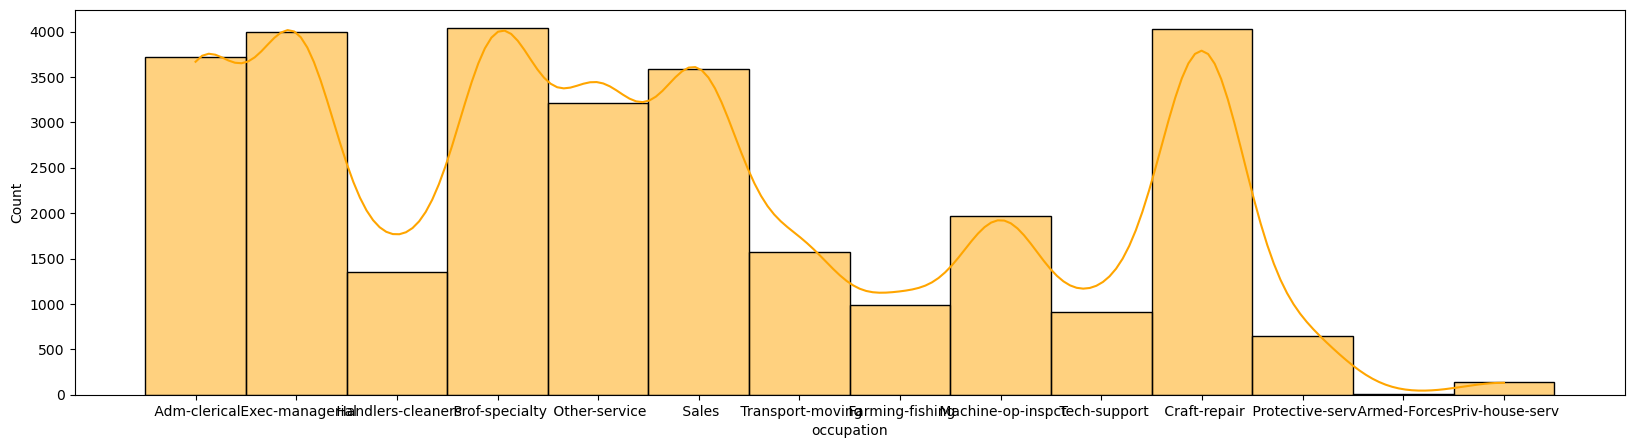

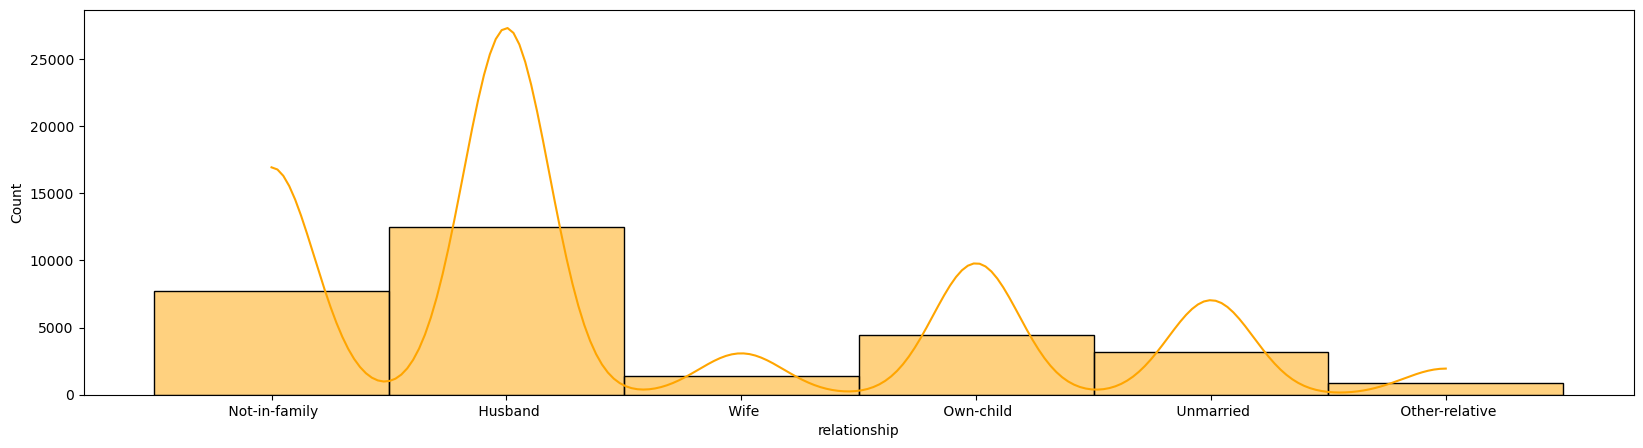

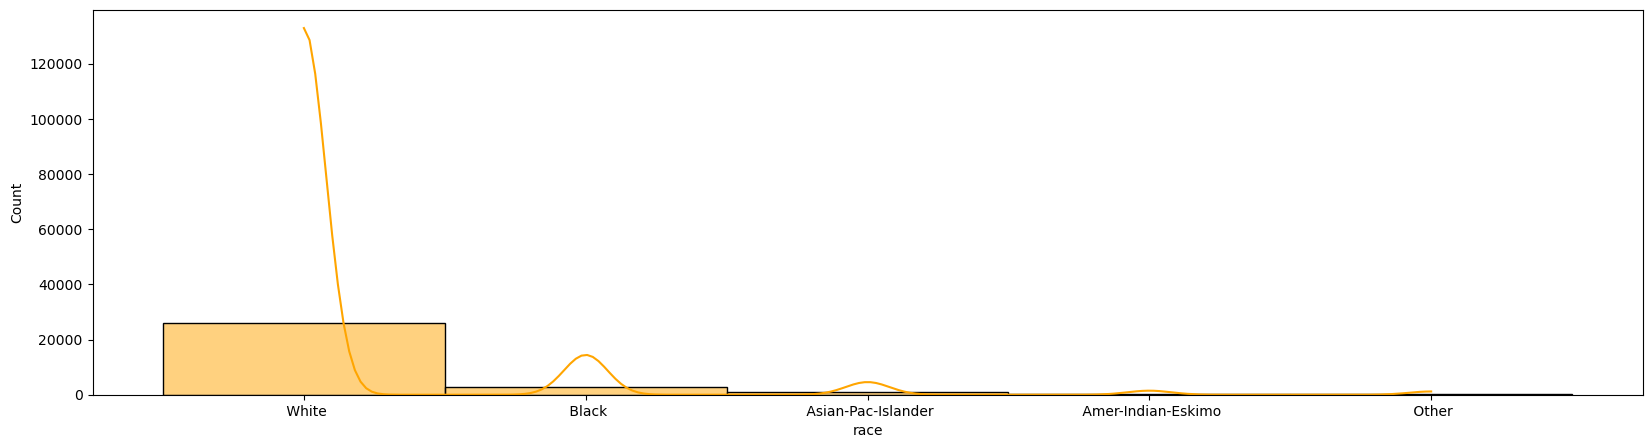

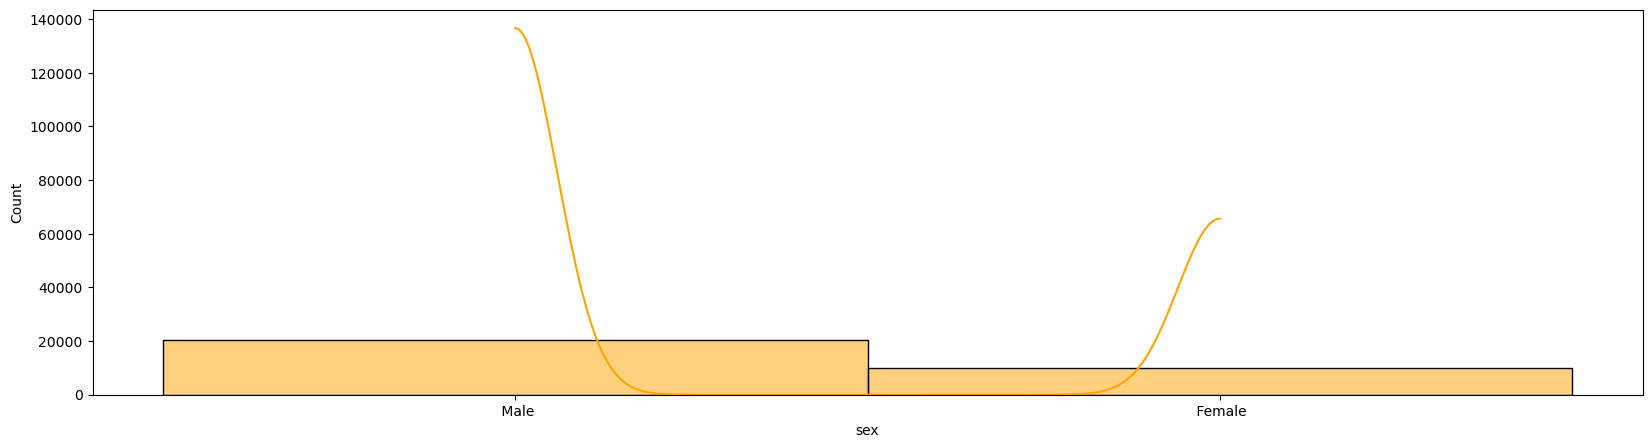

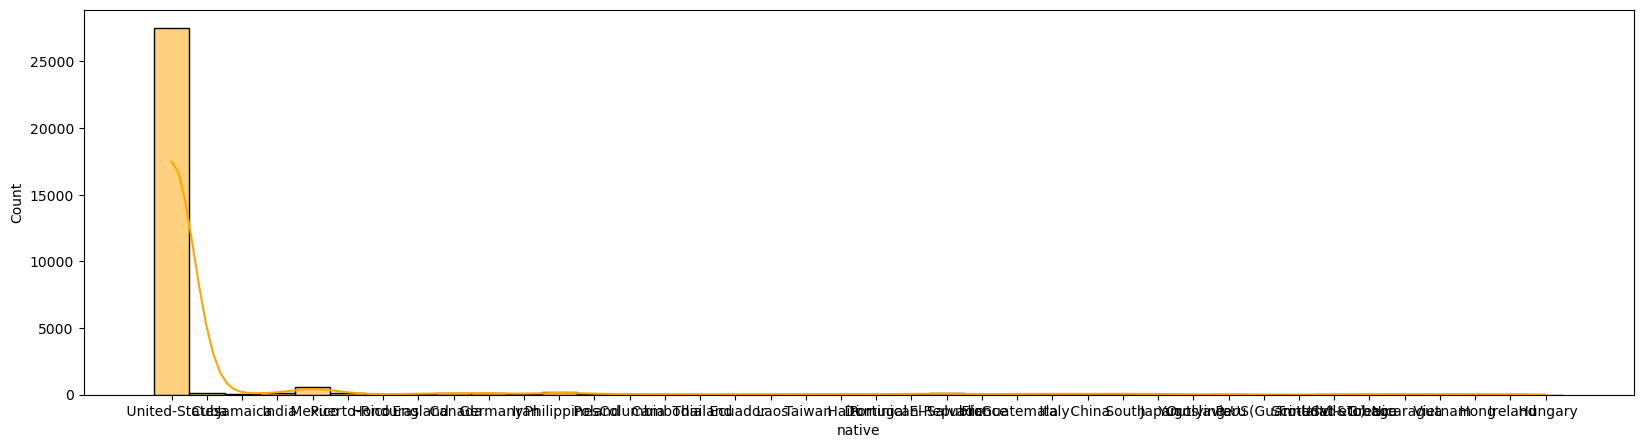

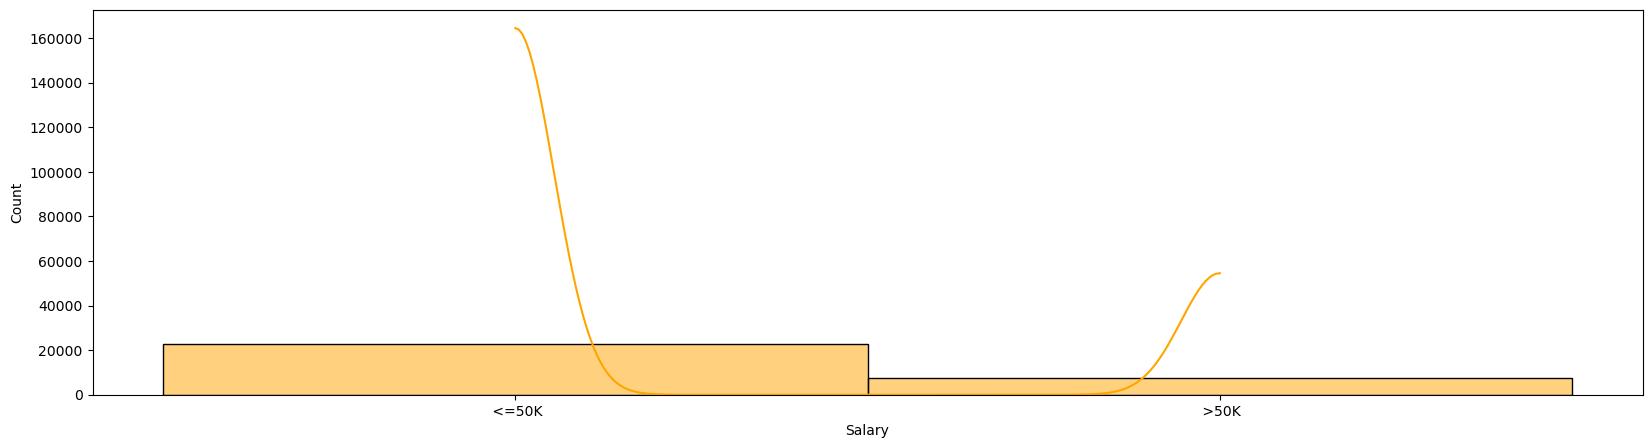

In [20]:

for var in categorical:
    plt.figure(figsize=(20,5))
    sns.histplot(salary_train[var],color ='orange',kde=True)

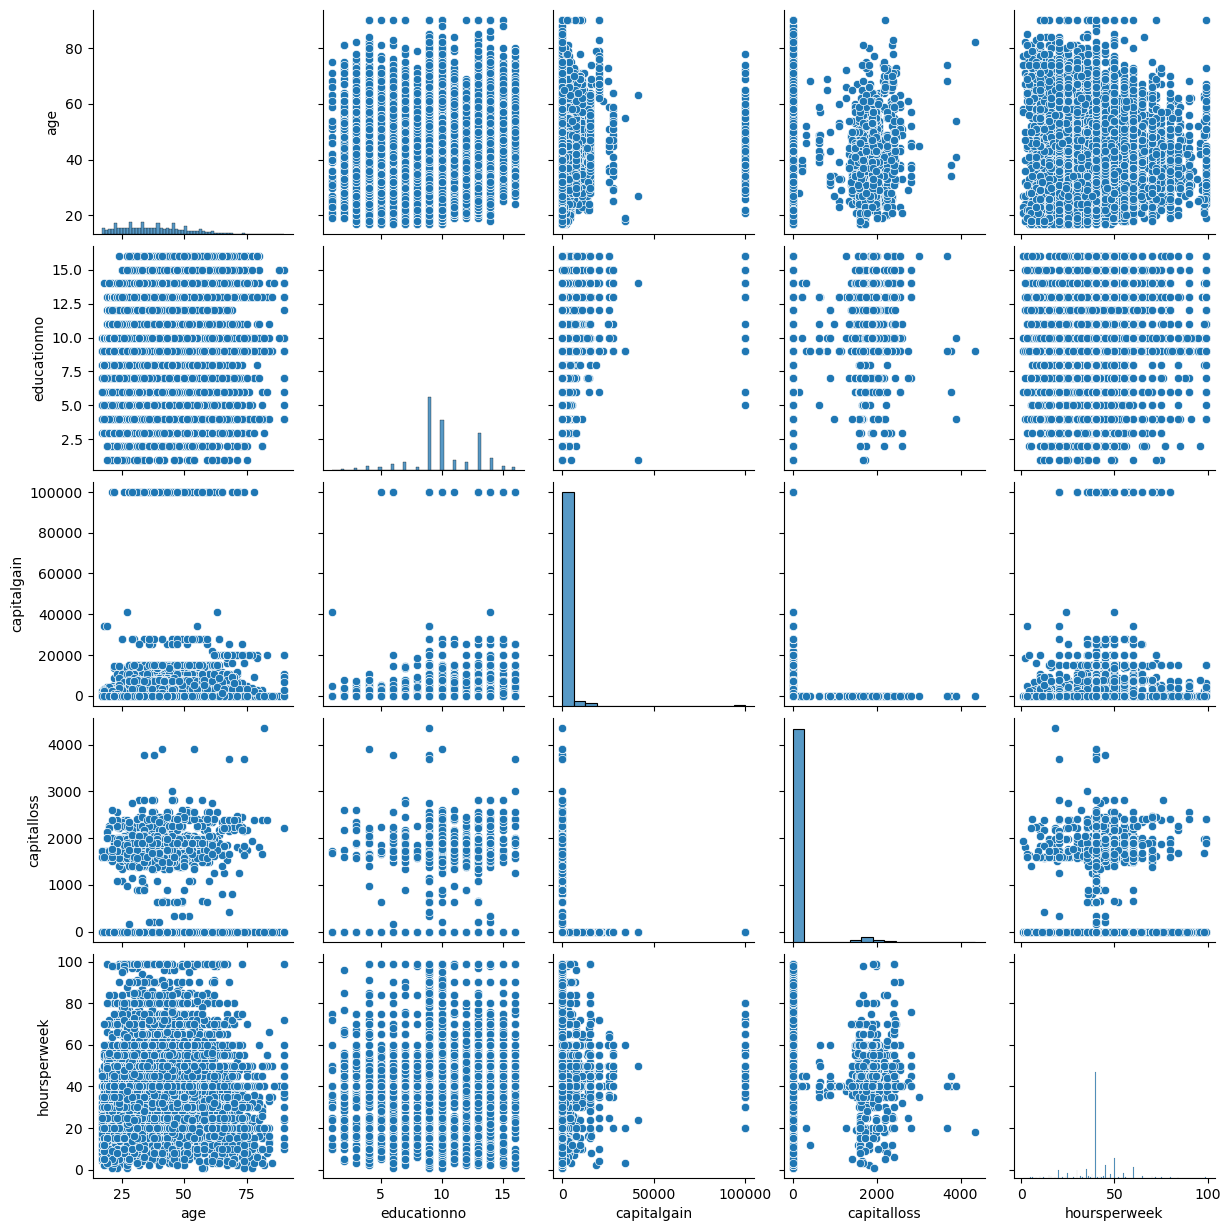

In [21]:
sns.pairplot(salary_train)

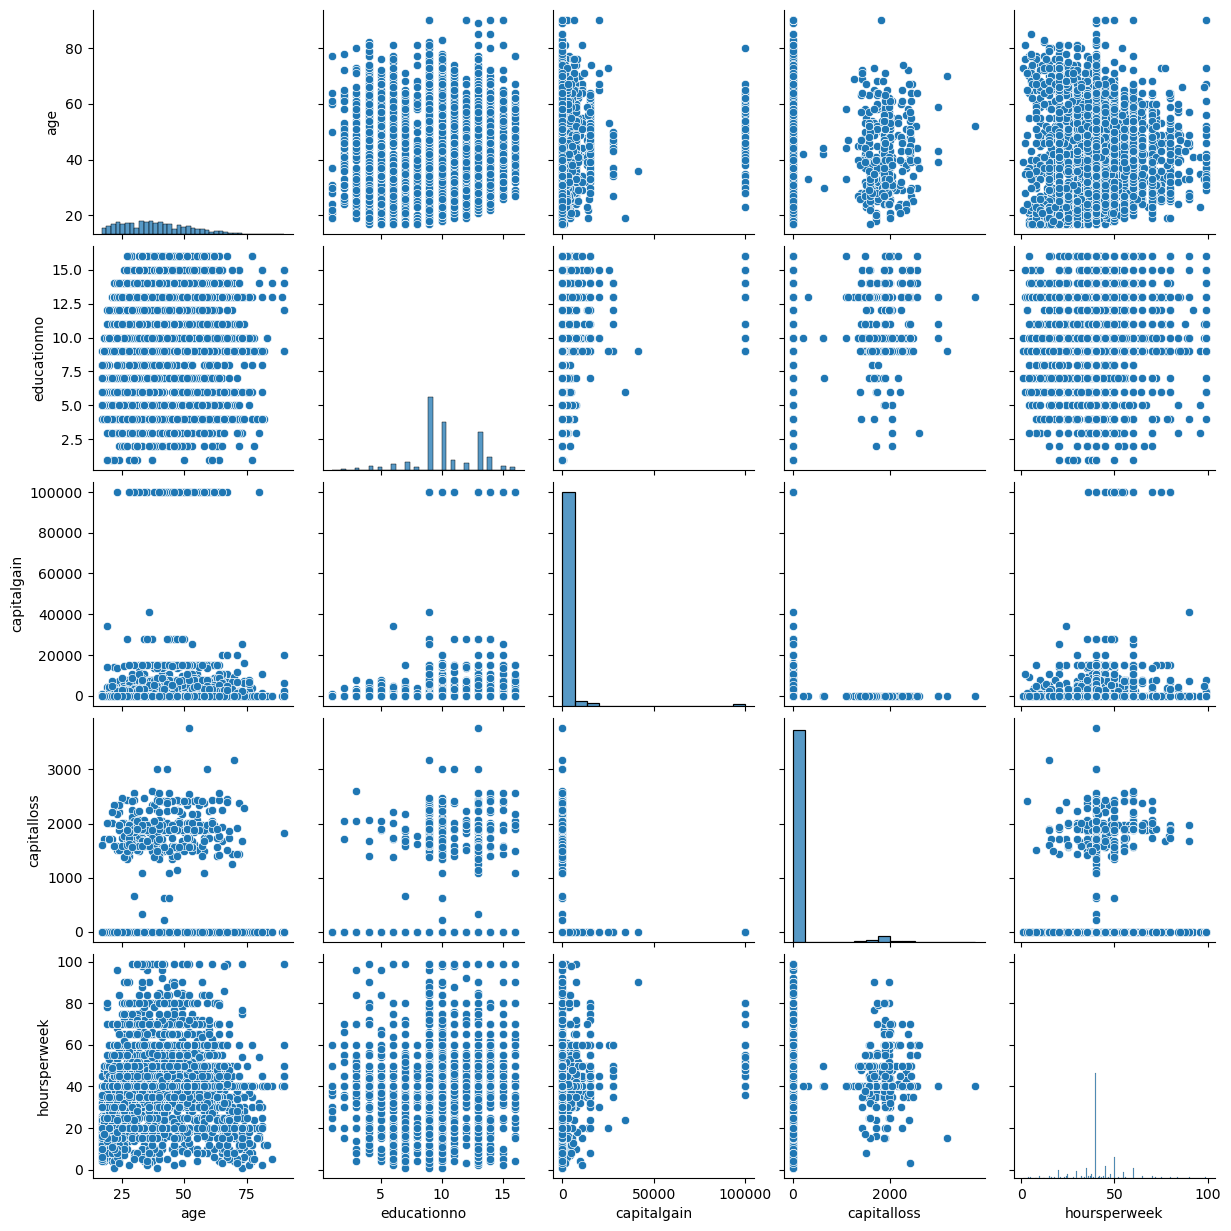

In [22]:
sns.pairplot(salary_test)

In [23]:
#Decalring dependent and independent
X = salary_train.drop(['Salary'],axis=1)
Y = salary_train['Salary']

In [24]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [25]:
Y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

# Split data into training and testing set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

In [27]:
X_train.shape, X_test.shape

((21112, 13), (9049, 13))

In [28]:
X_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [29]:
categorical = [col for col in X_train.columns if X_train[col].dtypes=='object']
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [30]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'object']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [31]:
#!pip install category_encoders

In [32]:
# import category encoders

import category_encoders as ce

In [33]:
X_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
8166,54,Local-gov,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,52,United-States
7138,21,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,30,United-States
437,30,Private,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,60,United-States
5436,42,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
6541,37,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,30,United-States


In [34]:
encoder = ce.OneHotEncoder(cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [35]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X_train.shape

(21112, 102)

# Feature Scaling

In [37]:
cols = X_train.columns

In [38]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [39]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.894737,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_test = pd.DataFrame(X_test, columns=[cols])
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.315789,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.842105,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Training

In [41]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train,Y_train)

GaussianNB()

In [42]:
y_pred = gnb.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [43]:
# Compare the train-set and test-set accuracy
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [44]:
from sklearn.metrics import accuracy_score



print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.7995


In [45]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train)))

Model accuracy score: 0.8023


In [46]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, Y_test)))

Training set score: 0.8023
Test set score: 0.7995


In [47]:
# check class distribution in test set

Y_test.value_counts()


 <=50K    6798
 >50K     2251
Name: Salary, dtype: int64

In [48]:
# check null accuracy score

null_accuracy = (6798/(6798+2251))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7512


In [49]:
#Confusion matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5422 1376]
 [ 438 1813]]

True Positives(TP) =  5422

True Negatives(TN) =  1813

False Positives(FP) =  1376

False Negatives(FN) =  438


<AxesSubplot:>

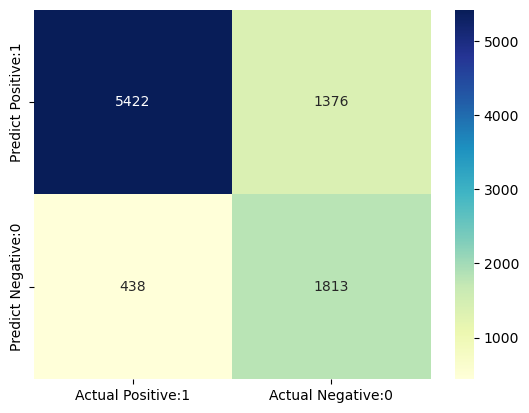

In [50]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [51]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      6798
        >50K       0.57      0.81      0.67      2251

    accuracy                           0.80      9049
   macro avg       0.75      0.80      0.76      9049
weighted avg       0.84      0.80      0.81      9049



In [52]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [53]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7995


In [54]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2005


In [55]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7976


In [56]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9253


In [57]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9253


In [58]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4315


In [59]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5685


In [60]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99955511e-01, 4.44887598e-05],
       [9.95935549e-01, 4.06445120e-03],
       [8.63901480e-01, 1.36098520e-01],
       [9.99999906e-01, 9.37239455e-08],
       [8.80888343e-02, 9.11911166e-01],
       [9.99562896e-01, 4.37103927e-04],
       [5.34482750e-06, 9.99994655e-01],
       [6.28497161e-01, 3.71502839e-01],
       [5.46536963e-04, 9.99453463e-01],
       [9.99999570e-01, 4.30495598e-07]])

In [61]:
# probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.999956,4.448876e-05
1,0.995936,4.064451e-03
2,0.863901,1.360985e-01
3,1.000000,9.372395e-08
4,0.088089,9.119112e-01
5,0.999563,4.371039e-04
6,0.000005,9.999947e-01
7,0.628497,3.715028e-01
8,0.000547,9.994535e-01
9,1.000000,4.304956e-07


In [62]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([4.44887598e-05, 4.06445120e-03, 1.36098520e-01, 9.37239455e-08,
       9.11911166e-01, 4.37103927e-04, 9.99994655e-01, 3.71502839e-01,
       9.99453463e-01, 4.30495598e-07])

In [63]:
#  the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

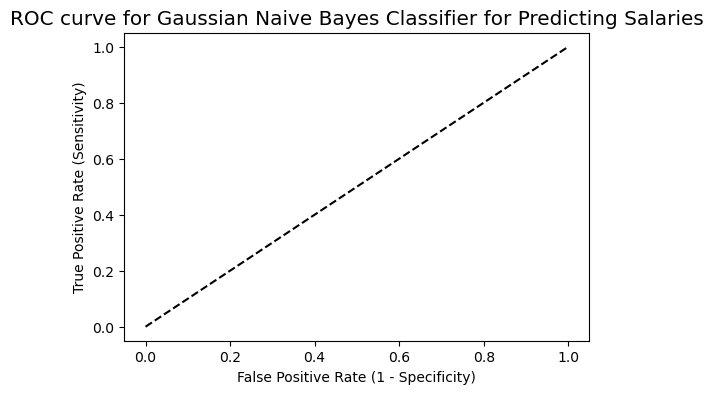

In [64]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()